In [38]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [39]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

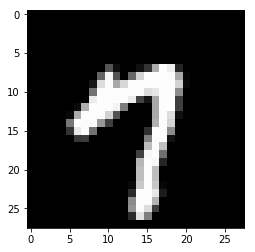

In [41]:
plt.imshow(x_train[0], cmap='gray')

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')

In [43]:
x_train.shape

(48000, 28, 28)

In [44]:
clf.fit(x_train.reshape((x_train.shape[0], -1)), y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [45]:
from sklearn.metrics import accuracy_score 

In [52]:
train_error = 1 - accuracy_score(y_train, clf.predict(x_train.reshape((x_train.shape[0], -1))))
val_error = 1 - accuracy_score(y_val, clf.predict(x_val.reshape((x_val.shape[0], -1))))

In [62]:
import numpy as np
depths = np.linspace(1, 20, 20)
train_errors = []
val_errors = []
for depth in depths:
    print("evaluating with depth: {}".format(depth))
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(x_train.reshape((x_train.shape[0], -1)), y_train)
    train_error = 1 - accuracy_score(y_train, clf.predict(x_train.reshape((x_train.shape[0], -1))))
    val_error = 1 - accuracy_score(y_val, clf.predict(x_val.reshape((x_val.shape[0], -1))))
    train_errors.append(train_error)
    val_errors.append(val_error)

evaluating with depth: 1.0
evaluating with depth: 2.0
evaluating with depth: 3.0
evaluating with depth: 4.0
evaluating with depth: 5.0
evaluating with depth: 6.0
evaluating with depth: 7.0
evaluating with depth: 8.0
evaluating with depth: 9.0
evaluating with depth: 10.0
evaluating with depth: 11.0
evaluating with depth: 12.0
evaluating with depth: 13.0
evaluating with depth: 14.0
evaluating with depth: 15.0
evaluating with depth: 16.0
evaluating with depth: 17.0
evaluating with depth: 18.0
evaluating with depth: 19.0
evaluating with depth: 20.0


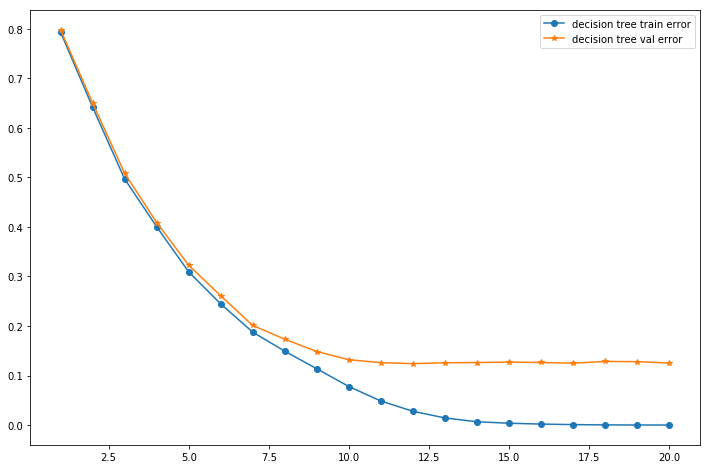

In [64]:
plt.figure(figsize=(12, 8))
plt.plot(depths, train_errors, label='decision tree train error', marker='o')
plt.plot(depths, val_errors, label='decision tree val error', marker='*')
plt.legend()

In [65]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(x_train.reshape((x_train.shape[0], -1)), y_train)
train_error = 1 - accuracy_score(y_train, clf.predict(x_train.reshape((x_train.shape[0], -1))))
val_error = 1 - accuracy_score(y_val, clf.predict(x_val.reshape((x_val.shape[0], -1))))

In [66]:
test_error = 1 - accuracy_score(y_test, clf.predict(x_test.reshape((x_test.shape[0], -1))))

In [67]:
test_error

0.12609999999999999

In [69]:
from joblib import dump, load
dump(clf, 'DecisionTree.joblib') 

['DecisionTree.joblib']

In [74]:
clf = load('DecisionTree.joblib') 

In [75]:
test_error = 1 - accuracy_score(y_test, clf.predict(x_test.reshape((x_test.shape[0], -1))))

In [76]:
test_error

0.12609999999999999